In [65]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
#Importing all libraries
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import warnings
import data as dt  # <-- Your implementation
warnings.filterwarnings('ignore')

In [68]:
#Reading all data
main_data = dt.load_data('data_original/Telco_customer_churn.xlsx')
demographics_data = dt.load_data('data_original/Telco_customer_churn_demographics.xlsx')
location_data = dt.load_data('data_original/Telco_customer_churn_location.xlsx')
population_data = dt.load_data('data_original/Telco_customer_churn_population.xlsx')
services_data = dt.load_data('data_original/Telco_customer_churn_services.xlsx')
status_data = dt.load_data('data_original/Telco_customer_churn_status.xlsx')
all_data = dt.load_data('data_edited/Telco_customer_churn_all.xlsx')

In [69]:
#Removing all columns whose values are the same, since they don't help
for aux_data in (main_data, demographics_data, location_data, population_data, services_data, status_data):
    columns = np.array(aux_data.columns)
    unique_columns = dt.unique_cols(aux_data)
    columns_to_remove = np.extract(unique_columns, columns)
    print(columns_to_remove)
    aux_data.drop(columns_to_remove, axis = 1, inplace = True)
    
#Combining 'all' the files into a single file. Only needed to run once
#dt.write_data(dt.join_all([main_data, demographics_data, location_data, services_data, status_data]), 'Telco_customer_churn_all.xlsx')

['Count' 'Country' 'State']
['Count']
['Count' 'Country' 'State']
[]
['Count' 'Quarter']
['Count' 'Quarter']


In [103]:
#Replacing every customer's city with 'Small Town' in case their zip code's population is less than 5000
small_zips = dt.extract_small_towns_zip_codes(population_data, 5000)
dt.replace_town_names_with_small_town(main_data, small_zips)
dt.replace_town_names_with_small_town(location_data, small_zips)
dt.replace_town_names_with_small_town(all_data, small_zips)

2408
2298
2408


In [104]:
location_data

,City,Zip Code,Lat Long,Latitude,Longitude
Customer ID,,,,,
8779-QRDMV,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
7495-OOKFY,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
1658-BYGOY,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
4598-XLKNJ,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4846-WHAFZ,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...
2569-WGERO,Small Town,92285,"34.341737, -116.539416",34.341737,-116.539416
6840-RESVB,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
2234-XADUH,Small Town,92304,"34.559882, -115.637164",34.559882,-115.637164


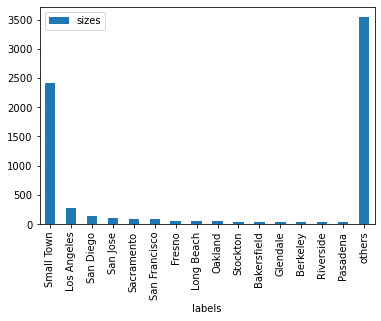

In [105]:
#Seeing how many costumers there are per city
dt.bar_chart(main_data['City'], 15)
#TODO: Change people's city's names to "Small City" for peole living in small cities on the Data cleaning phase

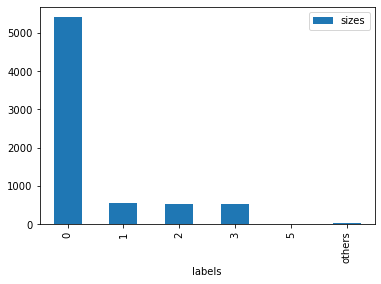

In [24]:
#Number of Dependants
dt.bar_chart(demographics_data['Number of Dependents'], 5)

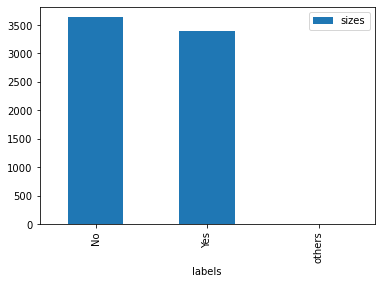

In [25]:
#Married
dt.bar_chart(demographics_data['Married'], 2)

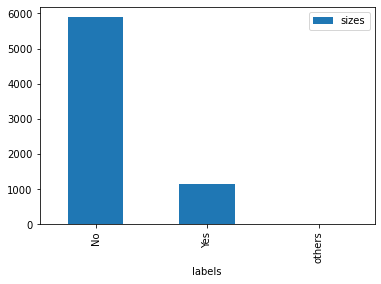

In [26]:
#Senior citizen
dt.bar_chart(demographics_data['Senior Citizen'], 2)

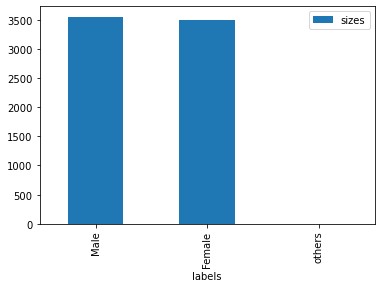

In [27]:
#Gender
dt.bar_chart(demographics_data['Gender'], 2)

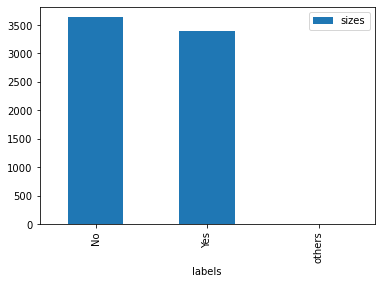

In [28]:
#Has a partner
dt.bar_chart(main_data['Partner'], 2)

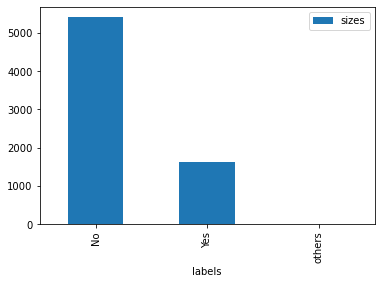

In [29]:
#Has dependents
dt.bar_chart(main_data['Dependents'], 2)

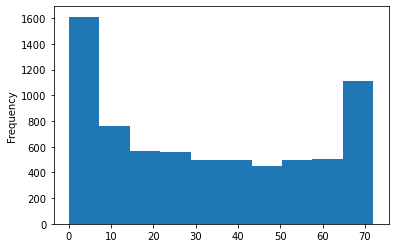

In [30]:
#Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
dt.hist(main_data['Tenure Months'])

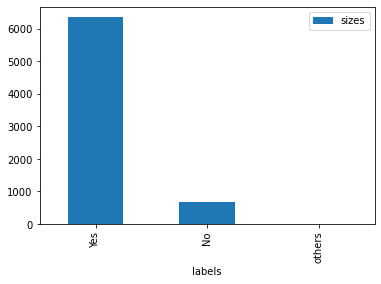

In [31]:
#Has Phone Service
dt.bar_chart(main_data['Phone Service'], 2)

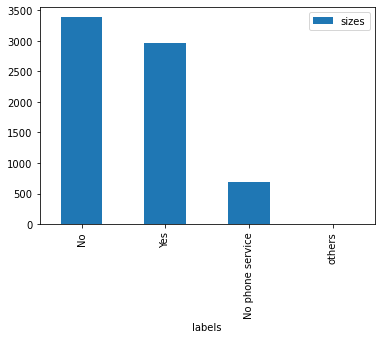

In [32]:
#Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company
dt.bar_chart(main_data['Multiple Lines'], 3)

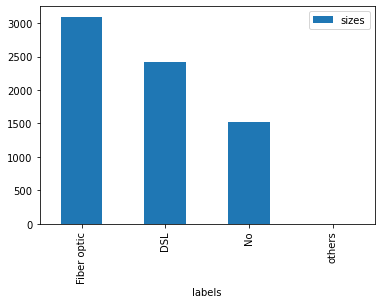

In [33]:
#Internet Service
dt.bar_chart(main_data['Internet Service'], 3)

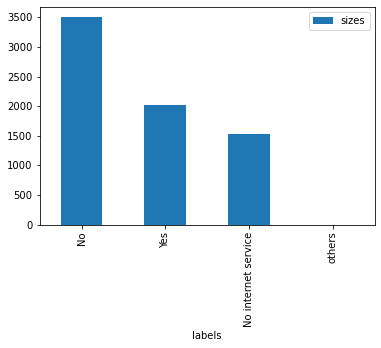

In [34]:
#Online Security
dt.bar_chart(main_data['Online Security'], 3)

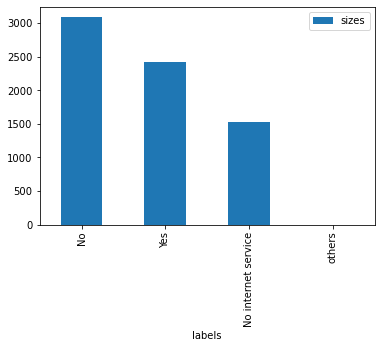

In [35]:
#Online Backup
dt.bar_chart(main_data['Online Backup'], 3)

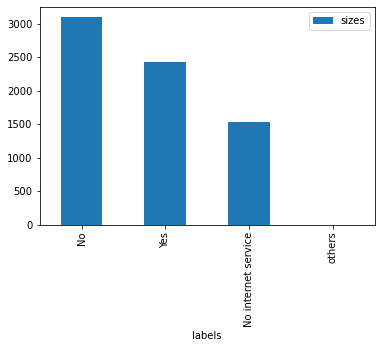

In [36]:
#Device Protection
dt.bar_chart(main_data['Device Protection'], 3)

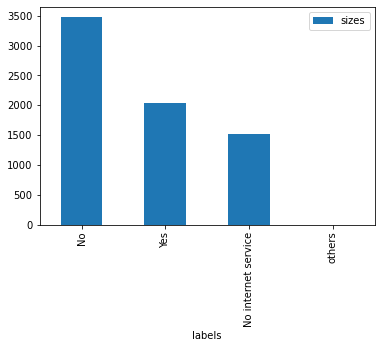

In [37]:
#Tech Support
dt.bar_chart(main_data['Tech Support'], 3)

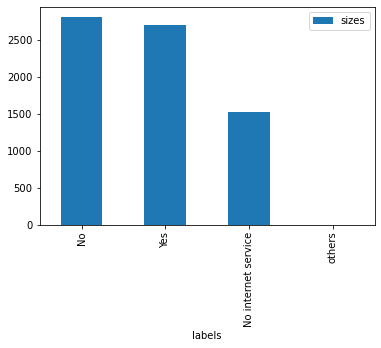

In [38]:
#Streaming TV
dt.bar_chart(main_data['Streaming TV'], 3)

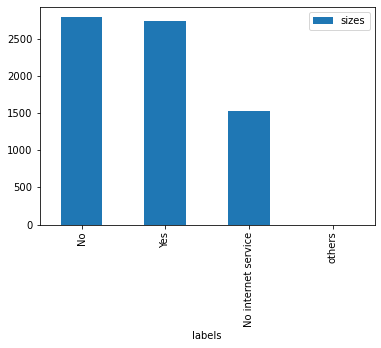

In [39]:
#Streaming Movies
dt.bar_chart(main_data['Streaming Movies'], 3)

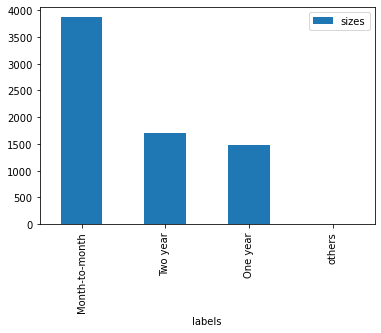

In [40]:
#Contract
dt.bar_chart(main_data['Contract'], 3)

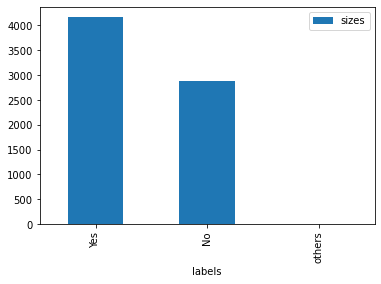

In [41]:
#Paperless Billing: Indicates if the customer has chosen paperless billing
dt.bar_chart(main_data['Paperless Billing'], 2)

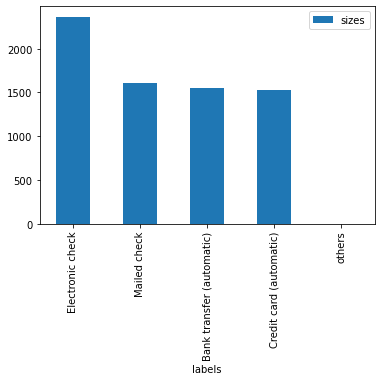

In [42]:
#Payment Method
dt.bar_chart(main_data['Payment Method'], 4)

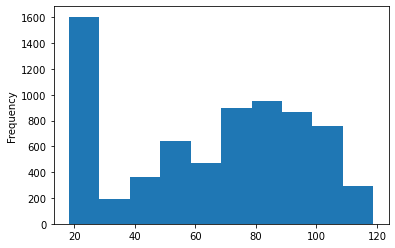

In [43]:
#Monthly Charges
dt.hist(main_data['Monthly Charges'])

In [44]:
#Total Charges
dt.hist(main_data['Total Charges'])

TypeError: no numeric data to plot

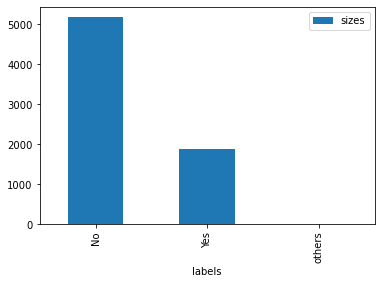

In [45]:
#Churn Label
dt.bar_chart(main_data['Churn Label'], 2)

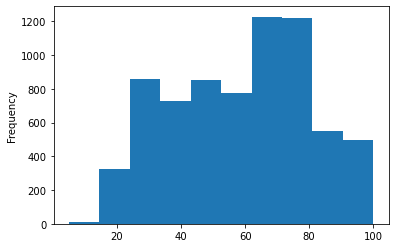

In [46]:
#Churn Value
dt.hist(main_data['Churn Score'])

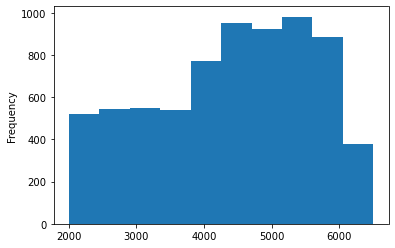

In [47]:
#CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
dt.hist(main_data['CLTV'])

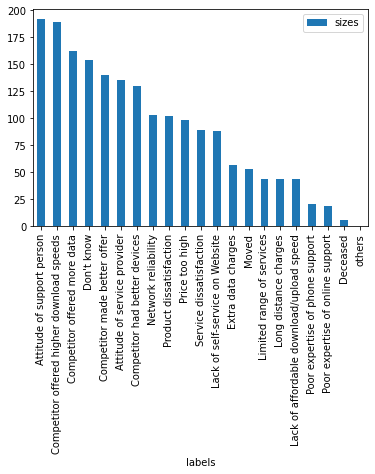

In [48]:
#Churn Reason
dt.bar_chart(main_data['Churn Reason'].dropna(), 20)

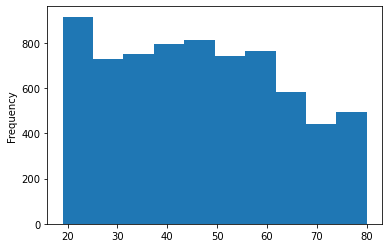

In [49]:
#Age
dt.hist(demographics_data['Age'])

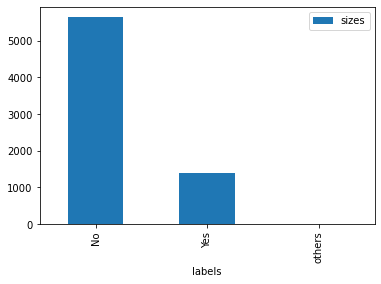

In [50]:
#Under 30
dt.bar_chart(demographics_data['Under 30'], 2)

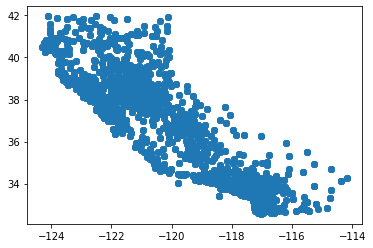

In [51]:
#Longitude and Latitude
dt.scatter(location_data['Longitude'], location_data['Latitude'])

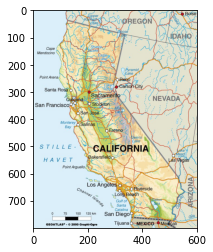

In [52]:
dt.print_image('California.jpg')

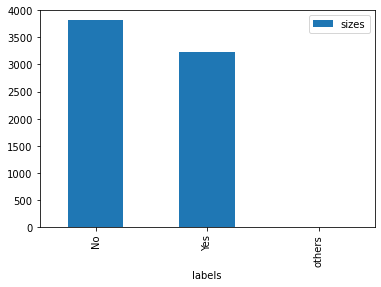

In [53]:
#Referred a Friend
dt.bar_chart(services_data['Referred a Friend'], 2)

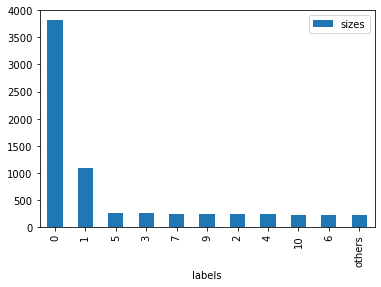

In [54]:
#Number of Referrals. Indicates the number of referrals to date that the customer has made.
dt.bar_chart(services_data['Number of Referrals'], 10)

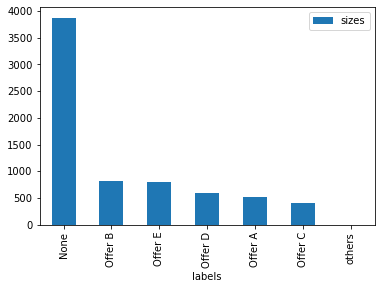

In [55]:
#Offer
dt.bar_chart(services_data['Offer'], 6)

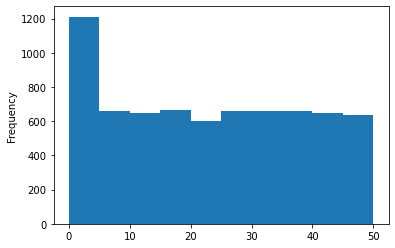

In [56]:
#Avg Monthly Long Distance Charges: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.
dt.hist(services_data['Avg Monthly Long Distance Charges'])

85

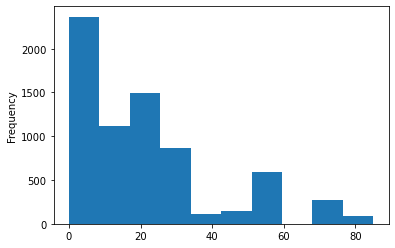

In [57]:
#Avg Monthly GB Download: Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.
dt.hist(services_data['Avg Monthly GB Download'])
services_data['Avg Monthly GB Download'].max()

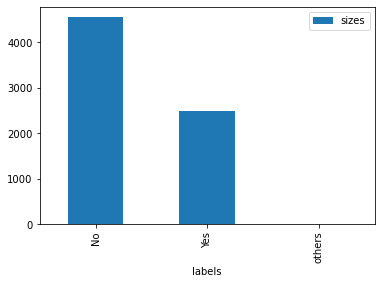

In [58]:
#Streaming Music
dt.bar_chart(services_data['Streaming Music'], 2)

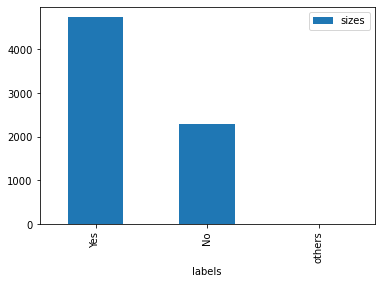

In [59]:
#Unlimited Data
dt.bar_chart(services_data['Unlimited Data'], 2)

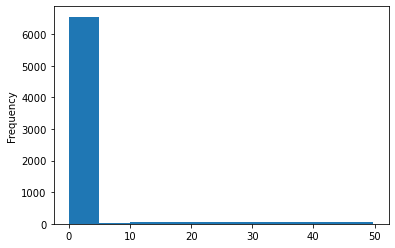

In [60]:
#Total Refunds
dt.hist(services_data['Total Refunds'])

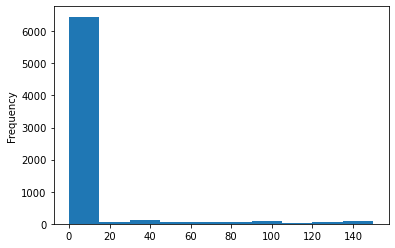

In [61]:
#Total Extra Data Charges
dt.hist(services_data['Total Extra Data Charges'])

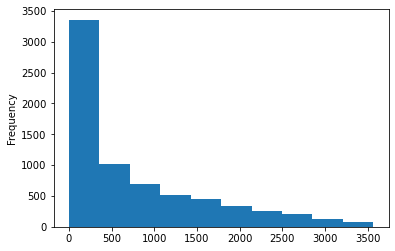

In [62]:
#Total Long Distance Charges
dt.hist(services_data['Total Long Distance Charges'])

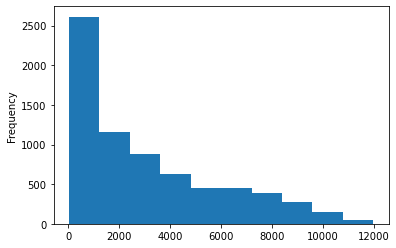

In [63]:
#Total Revenue
dt.hist(services_data['Total Revenue'])

In [64]:
#Creating a new file with only the latitude and longitude

#auxy = pd.DataFrame(data = {'Latitude' : all_data['Latitude'].values, 'Longitude' : all_data['Longitude'].values})
#dt.write_data_csv(all_data, 'Telco_customer_churn_all.csv', True)